## Analysis of Apple Stock
Examined the trend analysis, performing technical analysis, while inculcating specific market forces and events of Apple.
The code can be easily reused for other stocks.

## Import Libraries

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set_style('darkgrid')
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

# plt.style.available
plt.style.use("seaborn-whitegrid")

In [4]:
df = pd.read_csv('/Users/rev.dr.sylviablessings/Downloads/stock/all_stocks_5yr.csv')

In [5]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [6]:
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [9]:
df = df.rename(columns={'Name': 'Tickers'})

In [10]:
df.head()

,date,open,high,low,close,volume,Tickers
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [11]:
df.tail()

,date,open,high,low,close,volume,Tickers
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS
619039,2018-02-07,72.70,75.00,72.69,73.86,4534912,ZTS


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     619040 non-null  object 
 1   open     619029 non-null  float64
 2   high     619032 non-null  float64
 3   low      619032 non-null  float64
 4   close    619040 non-null  float64
 5   volume   619040 non-null  int64  
 6   Tickers  619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 37.8+ MB


## Change Datatype of Date Column

In [21]:
def changeintoDatetime(col):
    df[col] = pd.to_datetime(df[col])

In [22]:
changeintoDatetime('date')

## Analyzing Apple Stock

In [23]:
appleStock = df.loc[df['Tickers'] == 'AAPL']

In [24]:
appleStock.head()

,date,open,high,low,close,volume,Tickers
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [25]:
appleStock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 1259 to 2517
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     1259 non-null   datetime64[ns]
 1   open     1259 non-null   float64       
 2   high     1259 non-null   float64       
 3   low      1259 non-null   float64       
 4   close    1259 non-null   float64       
 5   volume   1259 non-null   int64         
 6   Tickers  1259 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 78.7+ KB


In [26]:
appleStock.head()

,date,open,high,low,close,volume,Tickers
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [27]:
appleStock_df = appleStock.copy()

## Plot Apple Stock

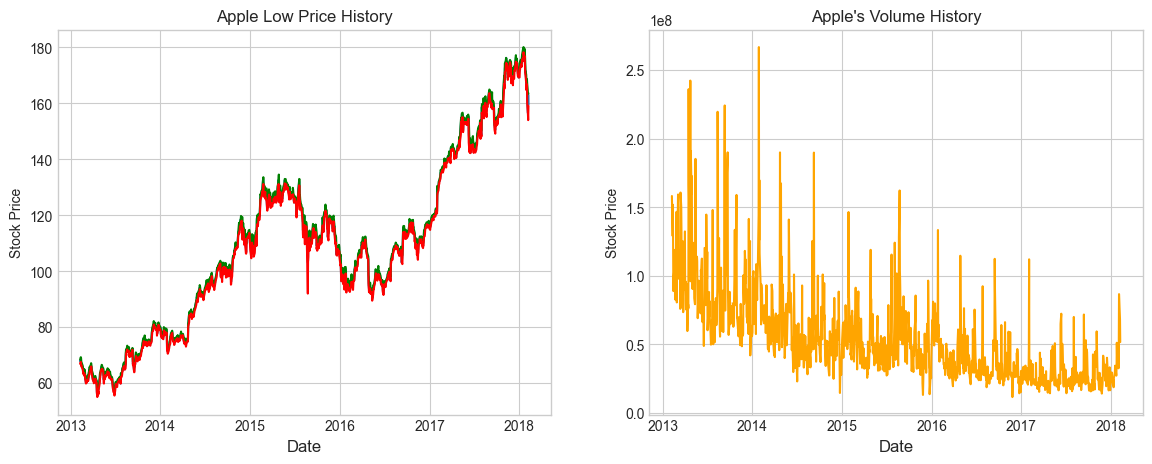

In [28]:
# Simple plotting of Amazon Stock Price
# First Subplot
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(appleStock_df["date"], appleStock_df["close"])
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Apple Close Price History")

# Second Subplot
ax1.plot(appleStock_df["date"], appleStock_df["high"], color="green")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Apple High Price History")

# Third Subplot
ax1.plot(appleStock_df["date"], appleStock_df["low"], color="red")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Apple Low Price History")

# Fourth Subplot
ax2.plot(appleStock_df["date"], appleStock_df["volume"], color="orange")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Stock Price")
ax2.set_title("Apple's Volume History")
plt.show()

## Trend of the Stock
###  --- One Year Trend

In [30]:
last_two = appleStock_df.loc[appleStock_df['date'].dt.year > 2016]

g = last_two.groupby(["date"])
monthly_averages = g.aggregate({"open": np.mean, "high": np.mean, "low": np.mean, "close":np.mean})
monthly_averages.reset_index(level=0, inplace=True)

trace = go.Candlestick(x=monthly_averages['date'],
                       open=monthly_averages['open'].values.tolist(),
                       high=monthly_averages['high'].values.tolist(),
                       low=monthly_averages['low'].values.tolist(),
                       close=monthly_averages['close'].values.tolist(),
                      increasing=dict(line=dict(color= '#58FA58')),
                decreasing=dict(line=dict(color= '#FA5858')))

layout = {
    'title': 'Apple Historical Price Trend <br> <i>Upward Trend </i>',
    'xaxis': {'title': 'Date',
             'rangeslider': {'visible': False}},
    'yaxis': {'title': 'Stock Price (USD$)'},
    'shapes': [{
        'x0': '2018-01-02', 'x1': '2018-01-02',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
    }],
    'annotations': [{
        'x': '2018-01-07', 'y': 0.9, 'xref': 'x', 'yref': 'paper',
        'showarrow': True, 'xanchor': 'left',
        'text': 'Trend'
    }]
}


data = [trace]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='simple_ohlc')

## Closer Look at This Trend

In [33]:
appleStock_df['month_year'] = pd.to_datetime(appleStock_df['date']).dt.to_period('M')

# 2017 onwards
last_year = appleStock_df.loc[appleStock_df['date'].dt.year > 2017]
g = last_year.groupby(["date"])
monthly_averages = g.aggregate({"open": np.mean, "high": np.mean, "low": np.mean, "close":np.mean})
monthly_averages.reset_index(level=0, inplace=True)

monthly_averages.dtypes


trace = go.Candlestick(x=monthly_averages['date'],
                       open=monthly_averages['open'].values.tolist(),
                       high=monthly_averages['high'].values.tolist(),
                       low=monthly_averages['low'].values.tolist(),
                       close=monthly_averages['close'].values.tolist(),
                      increasing=dict(line=dict(color= '#58FA58')),
                decreasing=dict(line=dict(color= '#FA5858')))


layout = {
    'title': 'Apple Historical Price <br><i>Close look at the trend (Bear & Bull) </i>',
    'xaxis': {'title': 'Date',
             'rangeslider': {'visible': False}},
    'yaxis': {'title': 'Stock Price (USD$)'}
}


data = [trace]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='simple_ohlc')

## Technical Analysis of Apple Stock

In [29]:
trace = go.Ohlc(x=appleStock_df['date'],
                open=appleStock_df['open'],
                high=appleStock_df['high'],
                low=appleStock_df['low'],
                close=appleStock_df['close'],
               increasing=dict(line=dict(color= '#58FA58')),
                decreasing=dict(line=dict(color= '#FA5858')))

layout = {
    'title': 'Amazon Historical Price',
    'xaxis': {'title': 'Date',
             'rangeslider': {'visible': False}},
    'yaxis': {'title': 'Stock Price (USD$)'},
    'shapes': [{
        'x0': '2016-12-09', 'x1': '2016-12-09',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
    }],
    'annotations': [{
        'x': '2017-01-20', 'y': 0.05, 'xref': 'x', 'yref': 'paper',
        'showarrow': False, 'xanchor': 'left',
        'text': 'President Donald Trump <br> takes Office'
    }]
}

data = [trace]
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='simple_ohlc')

## Moving Averages and Closing Price for Apple
### - 10 days, 50 days and 100 days

In [35]:
# Moving Averages (10, 50 and 100)
appleStock_df['10_d_avg'] = appleStock_df.close.rolling(window=10).mean()
appleStock_df['50_d_avg'] = appleStock_df.close.rolling(window=50).mean()
appleStock_df['100_d_avg'] = appleStock_df.close.rolling(window=100).mean()
close_p = appleStock_df['close'].values.tolist()


# Variables to insert into plotly
ten_d = appleStock_df['10_d_avg'].values.tolist()
fifty_d = appleStock_df['50_d_avg'].values.tolist()
oneh_d = appleStock_df['100_d_avg'].values.tolist()
date = appleStock_df['date'].values.tolist()

# Set date as index
appleStock_df = appleStock_df.set_index('date')

In [39]:
fig = tls.make_subplots(rows=2, cols=1, shared_xaxes=True)

colors = ['#ff4500', '#92a1cf', '#6E6E6E']
avgs = ['10_d_avg', '50_d_avg', '100_d_avg']
# for i,c in zip(range(n),color):
#    ax1.plot(x, y,c=c)

for col, c in zip(avgs, colors):
    fig.append_trace({'x': appleStock_df.index, 'y': appleStock_df[col], 'type': 'scatter', 'name': col, 'line': {'color': c}}, 1, 1)
for col in ['close']:
    fig.append_trace({'x': appleStock_df.index, 'y': appleStock_df[col], 'type': 'scatter', 'name': 'Closing Price', 'line':{'color': '#01DF3A'}}, 2, 1)

fig['layout'].update(height=800,title='Relationship between Moving Averages<br> and Closing Price',
                    paper_bgcolor='#F2DFCE', plot_bgcolor='#F2DFCE')

iplot(fig, filename='pandas/mixed-type subplots')